Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")
# Increase default plot size
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully.")

Libraries loaded successfully.


Load Data

In [6]:
# Load the dataset
# Make sure the file name matches your actual CSV file
df = pd.read_csv('Fertilizer.csv')

# Display first 5 rows to check structure
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (8000, 9)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


Data Cleaning

In [7]:
print("--- Cleaning Report ---")

# 1. Check for Missing Values
missing = df.isnull().sum().sum()
print(f"Missing Values: {missing}")
if missing > 0:
    # Drop rows with missing values
    df = df.dropna()
    print("Dropped rows with missing values.")

# 2. Check for Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()

# 3. Rename columns for easier access (Optional but recommended)
# Standardize names to avoid spaces (e.g., 'Soil Type' -> 'Soil_Type')
df.columns = [col.replace(' ', '_') for col in df.columns]
print(f"New Column Names: {list(df.columns)}")

# 4. Sanity Checks
# Ensure nutrients are not negative
df = df[df['Nitrogen'] >= 0]
df = df[df['Potassium'] >= 0]
df = df[df['Phosphorous'] >= 0]

print(f"Final Dataset Shape: {df.shape}")

--- Cleaning Report ---
Missing Values: 0
Duplicate Rows: 0
New Column Names: ['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer_Name']
Final Dataset Shape: (8000, 9)


Target Balance (Fertilizer Count)

C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_71504\2380192576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fertilizer_Name', data=df, palette='viridis', order=df['Fertilizer_Name'].value_counts().index)


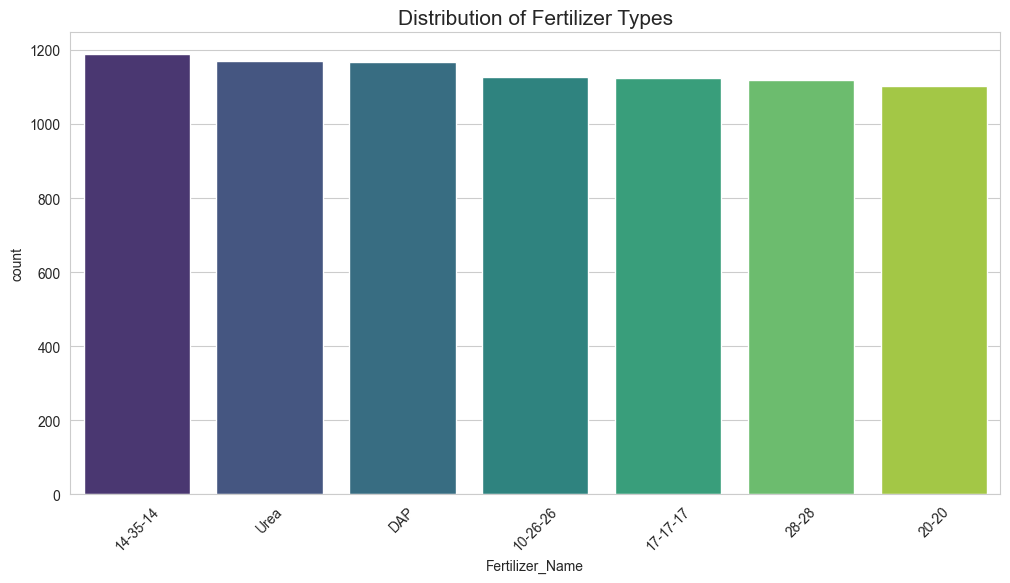

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Fertilizer_Name', data=df, palette='viridis', order=df['Fertilizer_Name'].value_counts().index)
plt.title('Distribution of Fertilizer Types', fontsize=15)
plt.xticks(rotation=45)
plt.show()

Nutrient Distribution (Box Plots)

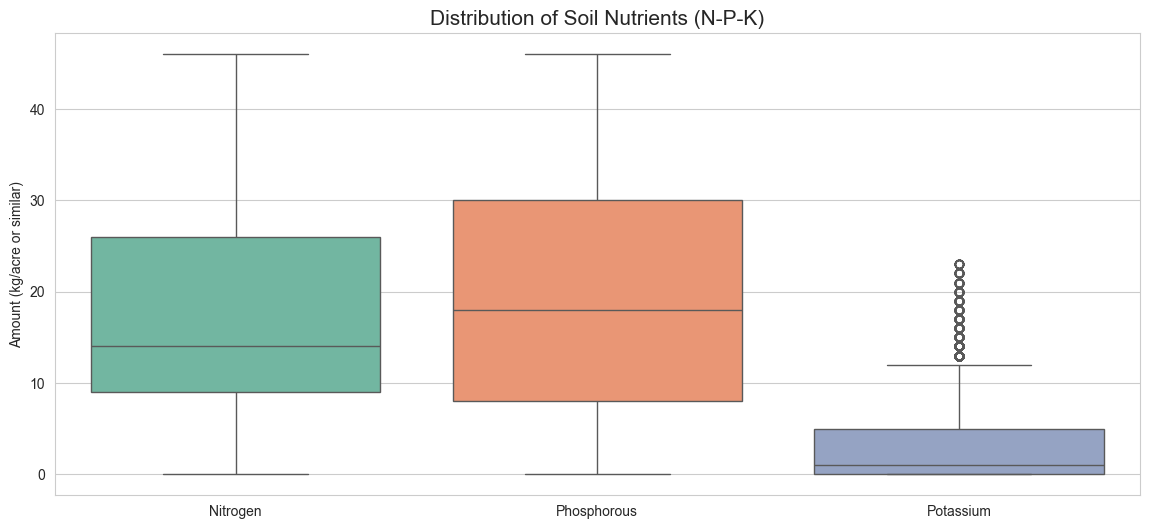

In [9]:
# Select nutrient columns
nutrients = ['Nitrogen', 'Phosphorous', 'Potassium']

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[nutrients], palette='Set2')
plt.title('Distribution of Soil Nutrients (N-P-K)', fontsize=15)
plt.ylabel('Amount (kg/acre or similar)')
plt.show()

Soil Type Analysis

C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_71504\2938529647.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Soil_Type', y='Nitrogen', data=df, palette='Blues', ci=None)
C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_71504\2938529647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Soil_Type', y='Nitrogen', data=df, palette='Blues', ci=None)


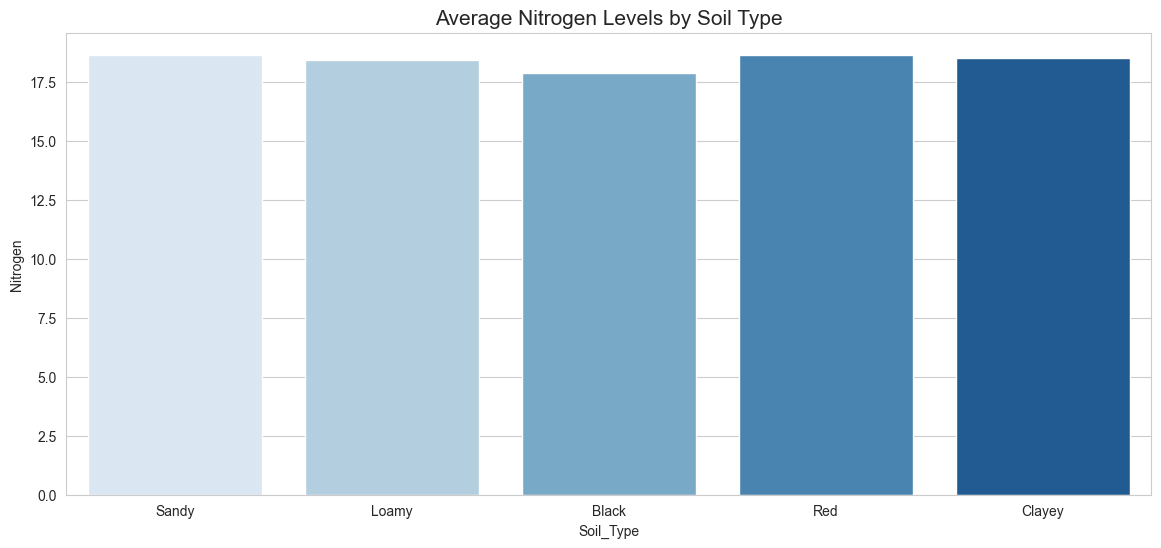

In [10]:
plt.figure(figsize=(14, 6))

# Plot Nitrogen levels by Soil Type
sns.barplot(x='Soil_Type', y='Nitrogen', data=df, palette='Blues', ci=None)
plt.title('Average Nitrogen Levels by Soil Type', fontsize=15)
plt.show()

Crop vs. Fertilizer Heatmap

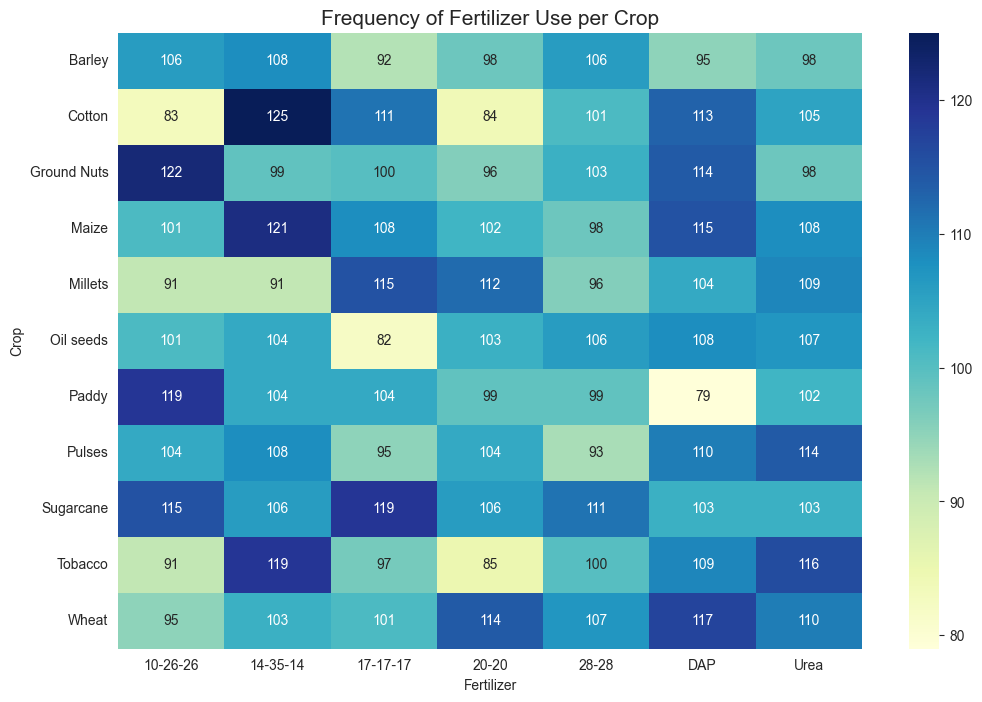

In [11]:
# Create a cross-tabulation (Count of each fertilizer per crop)
crop_fert_matrix = pd.crosstab(df['Crop_Type'], df['Fertilizer_Name'])

plt.figure(figsize=(12, 8))
sns.heatmap(crop_fert_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequency of Fertilizer Use per Crop', fontsize=15)
plt.xlabel('Fertilizer')
plt.ylabel('Crop')
plt.show()

Save Cleaned Data

In [12]:
# Save the cleaned version to be used in the ML step
df.to_csv('cleaned_fertilizer_data.csv', index=False)
print("✅ Cleaned data saved successfully.")

✅ Cleaned data saved successfully.
